<a href="https://colab.research.google.com/github/Lulu03damaris/Proyecto-de-proba/blob/main/Proyecto_Proba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Valores teóricos:
Bernoulli - Esperanza: 0.6750, Varianza: 0.2194
Binomial - Esperanza: 6.7500, Varianza: 2.1937
Neg. Binomial - Esperanza: 2.4074, Varianza: 3.5665
Geométrica - Esperanza: 0.4815, Varianza: 0.7133

Resultados de las simulaciones:
 Iteraciones  Bernoulli Media  Bernoulli Varianza  Binomial Media  Binomial Varianza  Neg. Binomial Media  Neg. Binomial Varianza  Geométrica Media  Geométrica Varianza
          20            0.500            0.263158           6.150           3.397368                2.000                1.894737             0.300             0.536842
          50            0.640            0.235102           6.860           2.449388                2.120                3.046531             0.420             0.493469
         100            0.740            0.194343           6.820           2.068283                2.090                2.931212             0.460             0.634747
         500            0.670            0.221543           6.704           

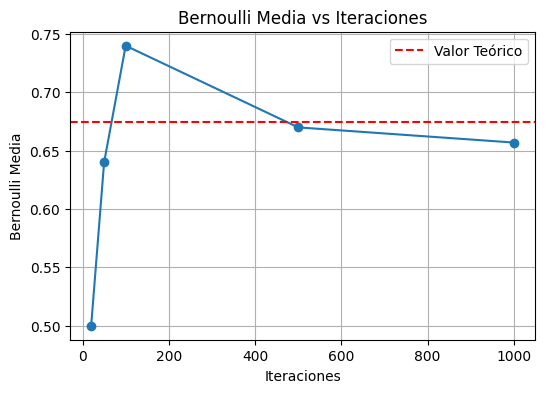

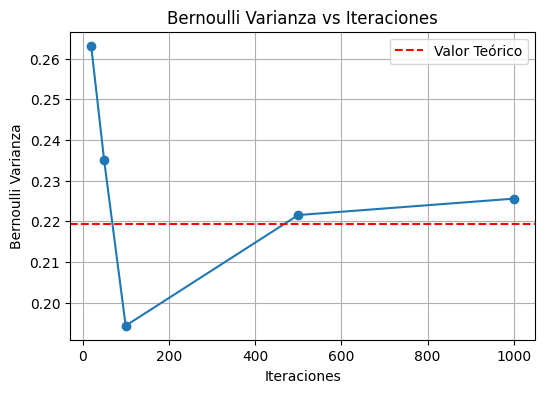

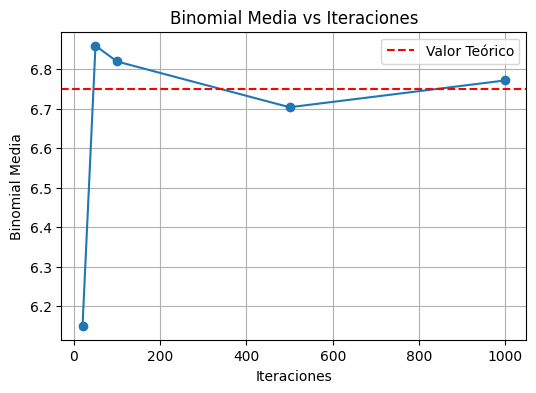

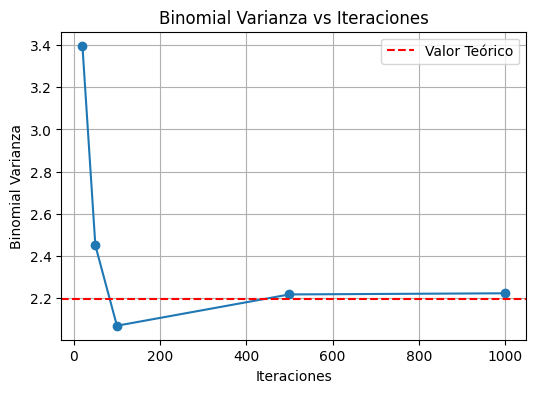

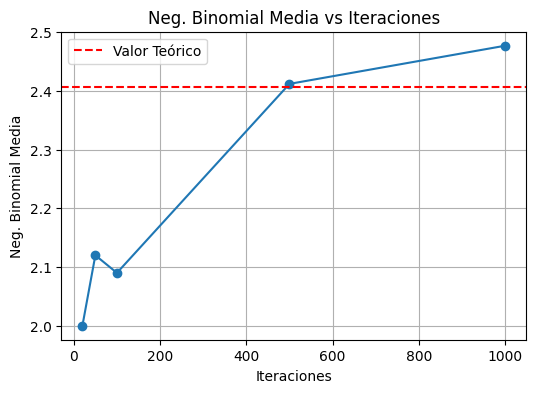

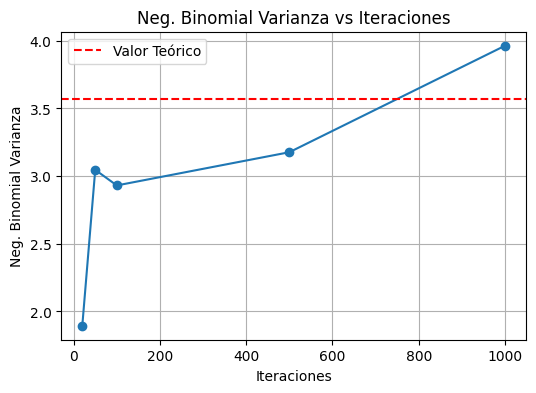

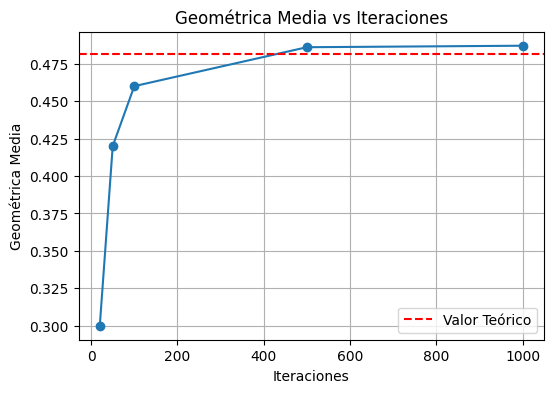

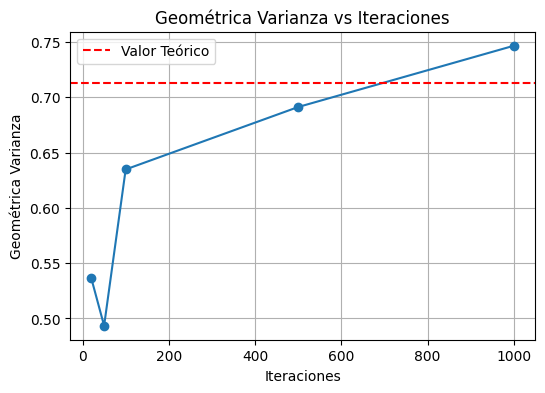

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def simulate_distributions(iterations_list, p=0.675, n_binom=10, r_neg_binom=5):
    results = []

    for iterations in iterations_list:
        bernoulli_samples = np.random.binomial(1, p, iterations)
        bernoulli_mean = np.mean(bernoulli_samples)
        bernoulli_var = np.var(bernoulli_samples, ddof=1)

        binom_samples = np.random.binomial(n_binom, p, iterations)
        binom_mean = np.mean(binom_samples)
        binom_var = np.var(binom_samples, ddof=1)

        neg_binom_samples = np.random.negative_binomial(r_neg_binom, p, iterations)
        neg_binom_mean = np.mean(neg_binom_samples)
        neg_binom_var = np.var(neg_binom_samples, ddof=1)

        geom_samples = np.random.geometric(p, iterations) - 1
        geom_mean = np.mean(geom_samples)
        geom_var = np.var(geom_samples, ddof=1)

        results.append([iterations,
                        bernoulli_mean, bernoulli_var,
                        binom_mean, binom_var,
                        neg_binom_mean, neg_binom_var,
                        geom_mean, geom_var])

    df_results = pd.DataFrame(results, columns=["Iteraciones",
                                                "Bernoulli Media", "Bernoulli Varianza",
                                                "Binomial Media", "Binomial Varianza",
                                                "Neg. Binomial Media", "Neg. Binomial Varianza",
                                                "Geométrica Media", "Geométrica Varianza"])

    teoricos = {"Bernoulli": (p, p*(1-p)),
                "Binomial": (n_binom*p, n_binom*p*(1-p)),
                "Neg. Binomial": (r_neg_binom*(1-p)/p, r_neg_binom*(1-p)/(p**2)),
                "Geométrica": ((1-p)/p, (1-p)/(p**2))}

    print("\nValores teóricos:")
    for key, value in teoricos.items():
        print(f"{key} - Esperanza: {value[0]:.4f}, Varianza: {value[1]:.4f}")

    print("\nResultados de las simulaciones:")
    print(df_results.to_string(index=False))



    for i, col in enumerate(df_results.columns[1:]):
        plt.figure(figsize=(6, 4))
        plt.plot(df_results["Iteraciones"], df_results[col], marker='o', linestyle='-')


        distribution_name = col.split()[0]
        if distribution_name == "Neg.":
            distribution_name = "Neg. Binomial"
        elif distribution_name == "Geométrica":
            distribution_name = "Geométrica"

        # Graficar con el valor teórico
        plt.axhline(y=teoricos[distribution_name][i % 2], color='r', linestyle='--', label='Valor Teórico')
        plt.xlabel("Iteraciones")
        plt.ylabel(col)
        plt.title(f"{col} vs Iteraciones")
        plt.legend()
        plt.grid()
        plt.show()

if __name__ == "__main__":
    iterations_list = [20, 50, 100, 500, 1000]
    simulate_distributions(iterations_list)
